# Applying the Model to Betting

Finally we will take the results of our model, specifically the predicted outcome probabilites of the test set, and use them to test different betting strategies.

### Calculate Probabilities from Odds

Here we will take the closing odds from Pinnacle for all the games in the test set and calculate the implied odds. These implied odds will always add up to a number slightly above 100, which is the bookie tax. The bookie tax ensures that the bookies always make a profit(but not with us!).

In [32]:
import pandas as pd
import numpy as np

In [33]:
df = pd.read_csv('EPL_Updated.csv')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   week                            2280 non-null   int64  
 1   date                            2280 non-null   object 
 2   home_team                       2280 non-null   object 
 3   home_xg                         2280 non-null   float64
 4   score                           2280 non-null   object 
 5   away_xg                         2280 non-null   float64
 6   away_team                       2280 non-null   object 
 7   referee                         2280 non-null   object 
 8   game_id                         2280 non-null   object 
 9   home_team_elo                   2280 non-null   float64
 10  away_team_elo                   2280 non-null   float64
 11  season                          2280 non-null   int64  
 12  home_starters                   22

In [35]:
# Create the new columns with the calculated values
df['implied home win prob'] = (1 / df['Pinnacle Home Win Odds']) * 100
df['implied draw prob'] = (1 / df['Pinnacle Draw Odds']) * 100
df['implied away win prob'] = (1 / df['Pinnacle Away Win Odds']) * 100

In [36]:
selected_columns = df[['game_id','home_team','away_team','Pinnacle Home Win Odds', 'Pinnacle Draw Odds', 'Pinnacle Away Win Odds', 'implied home win prob', 'implied draw prob', 'implied away win prob', 'match_result']]

In [37]:
selected_columns

,game_id,home_team,away_team,Pinnacle Home Win Odds,Pinnacle Draw Odds,Pinnacle Away Win Odds,implied home win prob,implied draw prob,implied away win prob,match_result
0,e3c3ddf0,arsenal,leicester city,1.53,4.55,6.85,65.359477,21.978022,14.598540,0
1,072bfc99,brighton,manchester city,10.95,5.55,1.34,9.132420,18.018018,74.626866,2
2,71b00bca,chelsea,burnley,1.26,6.30,15.25,79.365079,15.873016,6.557377,2
3,2d369d17,crystal palace,huddersfield,1.83,3.58,5.11,54.644809,27.932961,19.569472,2
4,7c834541,everton,stoke city,1.70,3.83,5.81,58.823529,26.109661,17.211704,0
...,...,...,...,...,...,...,...,...,...,...
2275,94de848f,everton,bournemouth,1.50,4.63,6.54,66.666667,21.598272,15.290520,0
2276,c9c73ddd,leeds united,tottenham,2.81,3.93,2.36,35.587189,25.445293,42.372881,2
2277,a96c9915,leicester city,west ham,1.95,4.02,3.64,51.282051,24.875622,27.472527,0
2278,64823dc9,manchester utd,fulham,1.53,4.65,5.84,65.359477,21.505376,17.123288,0


In [38]:
df['Total_implied_probability']= df['implied home win prob'] + df['implied draw prob'] + df['implied away win prob']

In [39]:
selected_columns = df[['game_id','home_team','away_team','Pinnacle Home Win Odds', 'Pinnacle Draw Odds', 'Pinnacle Away Win Odds', 'implied home win prob', 'implied draw prob', 'implied away win prob', 'Total_implied_probability', 'match_result']]

In [40]:
selected_columns

,game_id,home_team,away_team,Pinnacle Home Win Odds,Pinnacle Draw Odds,Pinnacle Away Win Odds,implied home win prob,implied draw prob,implied away win prob,Total_implied_probability,match_result
0,e3c3ddf0,arsenal,leicester city,1.53,4.55,6.85,65.359477,21.978022,14.598540,101.936039,0
1,072bfc99,brighton,manchester city,10.95,5.55,1.34,9.132420,18.018018,74.626866,101.777304,2
2,71b00bca,chelsea,burnley,1.26,6.30,15.25,79.365079,15.873016,6.557377,101.795472,2
3,2d369d17,crystal palace,huddersfield,1.83,3.58,5.11,54.644809,27.932961,19.569472,102.147241,2
4,7c834541,everton,stoke city,1.70,3.83,5.81,58.823529,26.109661,17.211704,102.144894,0
...,...,...,...,...,...,...,...,...,...,...,...
2275,94de848f,everton,bournemouth,1.50,4.63,6.54,66.666667,21.598272,15.290520,103.555459,0
2276,c9c73ddd,leeds united,tottenham,2.81,3.93,2.36,35.587189,25.445293,42.372881,103.405363,2
2277,a96c9915,leicester city,west ham,1.95,4.02,3.64,51.282051,24.875622,27.472527,103.630201,0
2278,64823dc9,manchester utd,fulham,1.53,4.65,5.84,65.359477,21.505376,17.123288,103.988141,0


In [41]:
test_preds_df = pd.read_csv('test_predicted_prob.csv')

In [42]:
test_preds_df

,Unnamed: 0,original_index,home_team,away_team,Probability_Home_win,Probability_Draw,Probability_Away_win
0,0,247,southampton,brighton,0.505090,0.293266,0.201644
1,1,2166,chelsea,everton,0.423812,0.273670,0.302518
2,2,1533,leeds united,everton,0.445344,0.266251,0.288405
3,3,2004,fulham,aston villa,0.320329,0.361570,0.318101
4,4,2243,west ham,manchester utd,0.318348,0.291461,0.390191
...,...,...,...,...,...,...,...
451,451,554,chelsea,leicester city,0.693173,0.190158,0.116669
452,452,1869,leicester city,everton,0.288173,0.370563,0.341264
453,453,678,liverpool,burnley,0.841485,0.100067,0.058448
454,454,382,fulham,crystal palace,0.488599,0.222061,0.289340


In [43]:
# Use merge to join the DataFrames
# 'original_index' is the column in test_preds_df to join on
# selected_columns.index will join on the index of the selected_columns DataFrame
# 'inner' ensures only records present in both DataFrames are included
result_df = pd.merge(test_preds_df, selected_columns, left_on='original_index', right_index=True, how='inner')

# Display the first few records of the resulting DataFrame
result_df.columns

Index(['Unnamed: 0', 'original_index', 'home_team_x', 'away_team_x',
       'Probability_Home_win', 'Probability_Draw', 'Probability_Away_win',
       'game_id', 'home_team_y', 'away_team_y', 'Pinnacle Home Win Odds',
       'Pinnacle Draw Odds', 'Pinnacle Away Win Odds', 'implied home win prob',
       'implied draw prob', 'implied away win prob',
       'Total_implied_probability', 'match_result'],
      dtype='object')

In [44]:
columns_to_drop = ['Unnamed: 0', 'original_index','game_id', 'home_team_y', 'away_team_y']

In [45]:
# Drop the specified columns
EV_calc_df = result_df.drop(columns=columns_to_drop)

In [46]:
csv_file_path = '/Users/lkimball/Desktop/Flatiron/CapstoneProject/EV_calc_df.csv'
EV_calc_df.to_csv(csv_file_path, index=True)

In [47]:
EV_calc_df

,home_team_x,away_team_x,Probability_Home_win,Probability_Draw,Probability_Away_win,Pinnacle Home Win Odds,Pinnacle Draw Odds,Pinnacle Away Win Odds,implied home win prob,implied draw prob,implied away win prob,Total_implied_probability,match_result
0,southampton,brighton,0.505090,0.293266,0.201644,1.77,3.48,5.99,56.497175,28.735632,16.694491,101.927298,1
1,chelsea,everton,0.423812,0.273670,0.302518,4.62,3.78,1.82,21.645022,26.455026,54.945055,103.045103,1
2,leeds united,everton,0.445344,0.266251,0.288405,2.39,3.51,3.14,41.841004,28.490028,31.847134,102.178166,1
3,fulham,aston villa,0.320329,0.361570,0.318101,2.94,3.47,2.54,34.013605,28.818444,39.370079,102.202128,0
4,west ham,manchester utd,0.318348,0.291461,0.390191,3.57,3.78,2.07,28.011204,26.455026,48.309179,102.775410,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,chelsea,leicester city,0.693173,0.190158,0.116669,1.33,5.42,11.37,75.187970,18.450185,8.795075,102.433229,2
452,leicester city,everton,0.288173,0.370563,0.341264,2.71,3.35,2.82,36.900369,29.850746,35.460993,102.212108,2
453,liverpool,burnley,0.841485,0.100067,0.058448,1.17,7.80,18.87,85.470085,12.820513,5.299417,103.590015,0
454,fulham,crystal palace,0.488599,0.222061,0.289340,2.50,3.46,3.00,40.000000,28.901734,33.333333,102.235067,2


## Calculating Expected Value

Expected Value(EV) shows us how much we can expect to win per bet(on average). In other words, it is a great indicator of what is a good bet.

In [48]:
# Recalculating EV using the correct formula

# Constants
stake = 10

# Recalculate EV for each outcome using the correct formula
EV_calc_df['Correct_EV_Home_Win'] = (EV_calc_df['Probability_Home_win'] * ((EV_calc_df['Pinnacle Home Win Odds']-1) * stake)) - ((1 - EV_calc_df['Probability_Home_win']) * stake)
EV_calc_df['Correct_EV_Draw'] = (EV_calc_df['Probability_Draw'] * ((EV_calc_df['Pinnacle Draw Odds']-1) * stake)) - ((1 - EV_calc_df['Probability_Draw']) * stake)
EV_calc_df['Correct_EV_Away_Win'] = (EV_calc_df['Probability_Away_win'] * ((EV_calc_df['Pinnacle Away Win Odds']-1) * stake)) - ((1 - EV_calc_df['Probability_Away_win']) * stake)

# Display the updated DataFrame with corrected EV columns
EV_calc_df[['home_team_x', 'away_team_x', 'Correct_EV_Home_Win', 'Correct_EV_Draw', 'Correct_EV_Away_Win']].head()

,home_team_x,away_team_x,Correct_EV_Home_Win,Correct_EV_Draw,Correct_EV_Away_Win
0,southampton,brighton,-1.059911,0.205668,2.078470
1,chelsea,everton,9.580093,0.344728,-4.494165
2,leeds united,everton,0.643732,-0.654604,-0.944084
3,fulham,aston villa,-0.582326,2.546481,-1.920237
4,west ham,manchester utd,1.365021,1.017228,-1.923046


## Simulating Betting Strategies

Now we will attempt a couple of different of betting strategies, and calculate the total profit and the return on investment(ROI) of each.

#### Betting on best EV outcome for each match

In [49]:
def find_highest_ev_bet(df):
    """
    Function to find the highest EV bet for each match.

    Parameters:
    df (DataFrame): A DataFrame containing EV calculations for each outcome.

    Returns:
    DataFrame: The original DataFrame with two new columns:
               'Highest_EV_Bet' indicating the type of bet (Home Win, Draw, Away Win),
               'Highest_EV_Value' indicating the value of the highest EV.
    """
    # Identifying the highest EV bet for each match
    bet_columns = ['Correct_EV_Home_Win', 'Correct_EV_Draw', 'Correct_EV_Away_Win']
    df['Highest_EV_Bet'] = df[bet_columns].idxmax(axis=1)
    df['Highest_EV_Value'] = df[bet_columns].max(axis=1)
    return df

# Applying the function to the DataFrame
EV_calc_df = find_highest_ev_bet(EV_calc_df)
EV_calc_df[['home_team_x', 'away_team_x', 'Highest_EV_Bet', 'Highest_EV_Value']].head()


,home_team_x,away_team_x,Highest_EV_Bet,Highest_EV_Value
0,southampton,brighton,Correct_EV_Away_Win,2.078470
1,chelsea,everton,Correct_EV_Home_Win,9.580093
2,leeds united,everton,Correct_EV_Home_Win,0.643732
3,fulham,aston villa,Correct_EV_Draw,2.546481
4,west ham,manchester utd,Correct_EV_Home_Win,1.365021


In [50]:
# Constants
stake = 10

# Define a function to find the best EV bet for each match
def best_ev_bet(row):
    # Extracting EV values and corresponding odds
    ev_values = {
        'Correct_EV_Home_Win': (row['Correct_EV_Home_Win'], row['Pinnacle Home Win Odds']),
        'Correct_EV_Draw': (row['Correct_EV_Draw'], row['Pinnacle Draw Odds']),
        'Correct_EV_Away_Win': (row['Correct_EV_Away_Win'], row['Pinnacle Away Win Odds'])
    }

    # Filter only positive EV bets
    positive_ev_bets = {k: v for k, v in ev_values.items() if v[0] > 0}

    # If no positive EV bets, return no bet
    if not positive_ev_bets:
        return None, "No Bet"

    # Find the bet with the highest EV
    best_bet = max(positive_ev_bets, key=lambda x: positive_ev_bets[x][0])
    return positive_ev_bets[best_bet][1], best_bet  # Return the odds and type of bet

# Apply the function to find the best bet for each match
EV_calc_df[['Best_Bet_Odds', 'Best_Bet_Type']] = EV_calc_df.apply(best_ev_bet, axis=1, result_type='expand')

# Define a function to calculate the outcome of the best bet
def calculate_best_bet_outcome(row):
    bet_type_to_result_mapping = {
        'Correct_EV_Home_Win': 0,
        'Correct_EV_Draw': 1,
        'Correct_EV_Away_Win': 2
    }
    bet_type = row['Best_Bet_Type']

    if bet_type != "No Bet" and bet_type_to_result_mapping[bet_type] == row['match_result']:
        # Bet won: Calculate profit using fractional odds
        profit = (row['Best_Bet_Odds'] - 1) * stake
        return profit
    elif bet_type != "No Bet":
        # Bet lost
        return -stake
    else:
        # No bet placed
        return 0

# Calculate the outcome of the best bet for each match
EV_calc_df['Best_Bet_Outcome'] = EV_calc_df.apply(calculate_best_bet_outcome, axis=1)

# Calculate the total profit/loss
total_profit_loss_best_bet = EV_calc_df['Best_Bet_Outcome'].sum()

# Displaying total profit/loss and a snippet of the DataFrame
total_profit_loss_best_bet, EV_calc_df[['Best_Bet_Type', 'Best_Bet_Odds', 'Best_Bet_Outcome']].head()



(1948.3000000000002,
          Best_Bet_Type  Best_Bet_Odds  Best_Bet_Outcome
 0  Correct_EV_Away_Win           5.99             -10.0
 1  Correct_EV_Home_Win           4.62             -10.0
 2  Correct_EV_Home_Win           2.39             -10.0
 3      Correct_EV_Draw           3.47             -10.0
 4  Correct_EV_Home_Win           3.57              25.7)

In [51]:
# Define a function to find the best EV bet for each match
def best_ev_bet(row):
    # Extracting EV values and corresponding odds
    ev_values = {
        'Correct_EV_Home_Win': (row['Correct_EV_Home_Win'], row['Pinnacle Home Win Odds']),
        'Correct_EV_Draw': (row['Correct_EV_Draw'], row['Pinnacle Draw Odds']),
        'Correct_EV_Away_Win': (row['Correct_EV_Away_Win'], row['Pinnacle Away Win Odds'])
    }

    # Filter only positive EV bets
    positive_ev_bets = {k: v for k, v in ev_values.items() if v[0] > 0}

    # If no positive EV bets, return no bet
    if not positive_ev_bets:
        return 0, None

    # Find the bet with the highest EV
    best_bet = max(positive_ev_bets, key=lambda x: positive_ev_bets[x][0])
    return positive_ev_bets[best_bet][1], best_bet  # Return the odds and type of bet

# Apply the function to find the best bet for each match
EV_calc_df['Best_Bet_Odds'], EV_calc_df['Best_Bet_Type'] = zip(*EV_calc_df.apply(best_ev_bet, axis=1))

# Define a function to calculate the outcome of the best bet
def calculate_best_bet_outcome(row):
    bet_type_to_result_mapping = {
        'Correct_EV_Home_Win': 0,
        'Correct_EV_Draw': 1,
        'Correct_EV_Away_Win': 2
    }
    bet_type = row['Best_Bet_Type']

    if bet_type and bet_type_to_result_mapping[bet_type] == row['match_result']:
        # Bet won
        return ((row['Best_Bet_Odds']) * stake) - stake
    elif bet_type:
        # Bet lost
        return -stake
    else:
        # No bet placed
        return 0

# Calculate the outcome of the best bet for each match
EV_calc_df['Best_Bet_Outcome'] = EV_calc_df.apply(calculate_best_bet_outcome, axis=1)

# Calculate the total profit/loss
total_profit_loss_best_bet = EV_calc_df['Best_Bet_Outcome'].sum()

total_profit_loss_best_bet, EV_calc_df[['Best_Bet_Type', 'Best_Bet_Odds', 'Best_Bet_Outcome']]


(1948.3000000000002,
            Best_Bet_Type  Best_Bet_Odds  Best_Bet_Outcome
 0    Correct_EV_Away_Win           5.99             -10.0
 1    Correct_EV_Home_Win           4.62             -10.0
 2    Correct_EV_Home_Win           2.39             -10.0
 3        Correct_EV_Draw           3.47             -10.0
 4    Correct_EV_Home_Win           3.57              25.7
 ..                   ...            ...               ...
 451  Correct_EV_Away_Win          11.37             103.7
 452      Correct_EV_Draw           3.35             -10.0
 453  Correct_EV_Away_Win          18.87             -10.0
 454  Correct_EV_Home_Win           2.50             -10.0
 455  Correct_EV_Away_Win           5.50              45.0
 
 [456 rows x 3 columns])

In [52]:
EV_calc_df.head()

,home_team_x,away_team_x,Probability_Home_win,Probability_Draw,Probability_Away_win,Pinnacle Home Win Odds,Pinnacle Draw Odds,Pinnacle Away Win Odds,implied home win prob,implied draw prob,...,Total_implied_probability,match_result,Correct_EV_Home_Win,Correct_EV_Draw,Correct_EV_Away_Win,Highest_EV_Bet,Highest_EV_Value,Best_Bet_Odds,Best_Bet_Type,Best_Bet_Outcome
0,southampton,brighton,0.505090,0.293266,0.201644,1.77,3.48,5.99,56.497175,28.735632,...,101.927298,1,-1.059911,0.205668,2.078470,Correct_EV_Away_Win,2.078470,5.99,Correct_EV_Away_Win,-10.0
1,chelsea,everton,0.423812,0.273670,0.302518,4.62,3.78,1.82,21.645022,26.455026,...,103.045103,1,9.580093,0.344728,-4.494165,Correct_EV_Home_Win,9.580093,4.62,Correct_EV_Home_Win,-10.0
2,leeds united,everton,0.445344,0.266251,0.288405,2.39,3.51,3.14,41.841004,28.490028,...,102.178166,1,0.643732,-0.654604,-0.944084,Correct_EV_Home_Win,0.643732,2.39,Correct_EV_Home_Win,-10.0
3,fulham,aston villa,0.320329,0.361570,0.318101,2.94,3.47,2.54,34.013605,28.818444,...,102.202128,0,-0.582326,2.546481,-1.920237,Correct_EV_Draw,2.546481,3.47,Correct_EV_Draw,-10.0
4,west ham,manchester utd,0.318348,0.291461,0.390191,3.57,3.78,2.07,28.011204,26.455026,...,102.775410,0,1.365021,1.017228,-1.923046,Correct_EV_Home_Win,1.365021,3.57,Correct_EV_Home_Win,25.7


#### Betting on All positive EV outcomes

Using Updated EV

In [53]:
# Adjusting the function to bet on all positive EV bets

# Define a function to calculate the outcome of positive EV bets
def calculate_positive_ev_outcomes(row):
    outcomes = {
        'Correct_EV_Home_Win': (0, row['Correct_EV_Home_Win'], row['Pinnacle Home Win Odds']),
        'Correct_EV_Draw': (1, row['Correct_EV_Draw'], row['Pinnacle Draw Odds']),
        'Correct_EV_Away_Win': (2, row['Correct_EV_Away_Win'], row['Pinnacle Away Win Odds'])
    }

    total_outcome = 0
    for bet_type, (result_code, ev, odds) in outcomes.items():
        if ev > 0:
            if result_code == row['match_result']:
                # Bet won
                total_outcome += (odds * stake) - stake
            else:
                # Bet lost
                total_outcome -= stake

    return total_outcome

# Apply the function to calculate outcomes for all positive EV bets
EV_calc_df['Positive_EV_Outcomes'] = EV_calc_df.apply(calculate_positive_ev_outcomes, axis=1)

# Calculate the total profit/loss for all positive EV bets
total_profit_loss_positive_ev = EV_calc_df['Positive_EV_Outcomes'].sum()

total_profit_loss_positive_ev

2263.7999999999997

In [54]:
EV_calc_df

,home_team_x,away_team_x,Probability_Home_win,Probability_Draw,Probability_Away_win,Pinnacle Home Win Odds,Pinnacle Draw Odds,Pinnacle Away Win Odds,implied home win prob,implied draw prob,...,match_result,Correct_EV_Home_Win,Correct_EV_Draw,Correct_EV_Away_Win,Highest_EV_Bet,Highest_EV_Value,Best_Bet_Odds,Best_Bet_Type,Best_Bet_Outcome,Positive_EV_Outcomes
0,southampton,brighton,0.505090,0.293266,0.201644,1.77,3.48,5.99,56.497175,28.735632,...,1,-1.059911,0.205668,2.078470,Correct_EV_Away_Win,2.078470,5.99,Correct_EV_Away_Win,-10.0,14.8
1,chelsea,everton,0.423812,0.273670,0.302518,4.62,3.78,1.82,21.645022,26.455026,...,1,9.580093,0.344728,-4.494165,Correct_EV_Home_Win,9.580093,4.62,Correct_EV_Home_Win,-10.0,17.8
2,leeds united,everton,0.445344,0.266251,0.288405,2.39,3.51,3.14,41.841004,28.490028,...,1,0.643732,-0.654604,-0.944084,Correct_EV_Home_Win,0.643732,2.39,Correct_EV_Home_Win,-10.0,-10.0
3,fulham,aston villa,0.320329,0.361570,0.318101,2.94,3.47,2.54,34.013605,28.818444,...,0,-0.582326,2.546481,-1.920237,Correct_EV_Draw,2.546481,3.47,Correct_EV_Draw,-10.0,-10.0
4,west ham,manchester utd,0.318348,0.291461,0.390191,3.57,3.78,2.07,28.011204,26.455026,...,0,1.365021,1.017228,-1.923046,Correct_EV_Home_Win,1.365021,3.57,Correct_EV_Home_Win,25.7,15.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,chelsea,leicester city,0.693173,0.190158,0.116669,1.33,5.42,11.37,75.187970,18.450185,...,2,-0.780803,0.306571,3.265280,Correct_EV_Away_Win,3.265280,11.37,Correct_EV_Away_Win,103.7,93.7
452,leicester city,everton,0.288173,0.370563,0.341264,2.71,3.35,2.82,36.900369,29.850746,...,2,-2.190502,2.413857,-0.376362,Correct_EV_Draw,2.413857,3.35,Correct_EV_Draw,-10.0,-10.0
453,liverpool,burnley,0.841485,0.100067,0.058448,1.17,7.80,18.87,85.470085,12.820513,...,0,-0.154628,-2.194747,1.029119,Correct_EV_Away_Win,1.029119,18.87,Correct_EV_Away_Win,-10.0,-10.0
454,fulham,crystal palace,0.488599,0.222061,0.289340,2.50,3.46,3.00,40.000000,28.901734,...,2,2.214964,-2.316674,-1.319800,Correct_EV_Home_Win,2.214964,2.50,Correct_EV_Home_Win,-10.0,-10.0


#### Calculating the ROI for all EV bets strategy

In [55]:
# Counting the number of bets placed based on positive EV in any of the EV columns

# Counting positive EV bets in each column
num_bets_home_win = EV_calc_df[EV_calc_df['Correct_EV_Home_Win'] > 0].shape[0]
num_bets_draw = EV_calc_df[EV_calc_df['Correct_EV_Draw'] > 0].shape[0]
num_bets_away_win = EV_calc_df[EV_calc_df['Correct_EV_Away_Win'] > 0].shape[0]

# Total number of positive EV bets
total_positive_ev_bets = num_bets_home_win + num_bets_draw + num_bets_away_win

# Recalculate Total Investment
total_investment_corrected = total_positive_ev_bets * stake

# Recalculate ROI with the corrected total investment
roi_corrected = (total_profit_loss_positive_ev / total_investment_corrected) * 100

roi_corrected, total_positive_ev_bets, total_investment_corrected


(37.050736497545, 611, 6110)

#### Calculating the ROI for best EV bets strategy

In [56]:
# Calculating ROI for the strategy of betting on the best EV outcome per match

# Count the number of matches where a bet was placed (i.e., Best_Bet_Type is not None)
num_best_ev_bets = EV_calc_df[EV_calc_df['Best_Bet_Type'].notna()].shape[0]

# Total investment for best EV bet per match
total_investment_best_ev = num_best_ev_bets * stake

# Total profit from the best EV bet per match strategy
total_profit_best_ev = EV_calc_df['Best_Bet_Outcome'].sum()

# Calculate ROI for best EV bet per match strategy
roi_best_ev = (total_profit_best_ev / total_investment_best_ev) * 100

roi_best_ev, num_best_ev_bets, total_investment_best_ev


(43.10398230088496, 452, 4520)

As we can see from our ROI results, betting the most positive EV bet for each game using pinnacle's odd is very effective, giving us a 43.78% return on our investment of 4560$, over the course of 456 matches.

#### Sanity checking

Here are going to check how good Pinnacle is at predicting the winner of soccer matches across the test set. For reference, our model had an accuracy of .528.

In [57]:
def determine_implied_result(row):
    if row['implied home win prob'] > max(row['implied draw prob'], row['implied away win prob']):
        return 0
    elif row['implied draw prob'] > max(row['implied home win prob'], row['implied away win prob']):
        return 1
    else:
        return 2

EV_calc_df['implied_match_result'] = EV_calc_df.apply(determine_implied_result, axis=1)


In [58]:
matching_results_count = (EV_calc_df['implied_match_result'] == EV_calc_df['match_result']).sum()

matching_results_count 

215

In [59]:
matching_results_count/(len(EV_calc_df))

0.47149122807017546

As we can see here if we takes Pinnacle's favorite, according to their odds, as they pick for the match winner, they have an accuracy of only 47.15%. This means that our betting strategies are not out of whack and we do have an advantage over the bookie.

In [60]:
# Counting positive vs. negative outcomes in the 'Best_Bet_Outcome' column
positive_outcomes = (EV_calc_df['Best_Bet_Outcome'] > 0).sum()
negative_outcomes = (EV_calc_df['Best_Bet_Outcome'] < 0).sum()

positive_outcomes, negative_outcomes


(177, 275)

In [67]:
# Counting positive vs. negative outcomes in the 'Best_Bet_Outcome' column
positive_outcomes = (EV_calc_df['Positive_EV_Outcomes'] > 0).sum()
negative_outcomes = (EV_calc_df['Positive_EV_Outcomes'] < 0).sum()

positive_outcomes, negative_outcomes


(213, 239)

In [61]:
csv_file_path = '/Users/lkimball/Desktop/Flatiron/CapstoneProject/EV_calc_df.csv'
EV_calc_df.to_csv(csv_file_path, index=True)

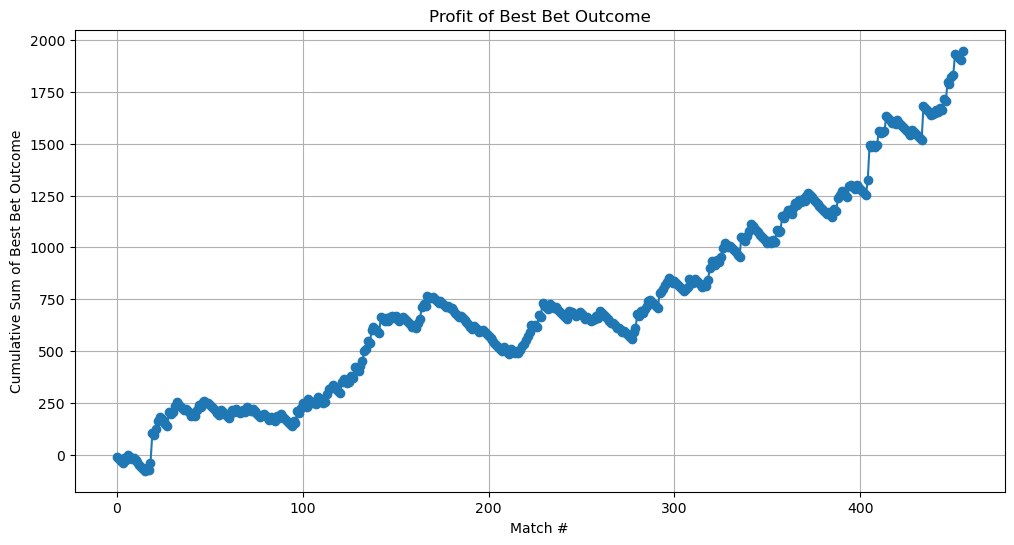

In [65]:
# Since we're using the index to represent time, we'll calculate the cumulative sum of the 'Best_Bet_Outcome' column
EV_calc_df['Cumulative_Best_Bet_Outcome'] = EV_calc_df['Best_Bet_Outcome'].cumsum()

# Importing matplotlib for plotting
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(EV_calc_df.index, EV_calc_df['Cumulative_Best_Bet_Outcome'], marker='o', linestyle='-')
plt.title('Profit of Best Bet Outcome')
plt.xlabel('Match #')
plt.ylabel('Cumulative Sum of Best Bet Outcome')
plt.grid(True)
plt.show()


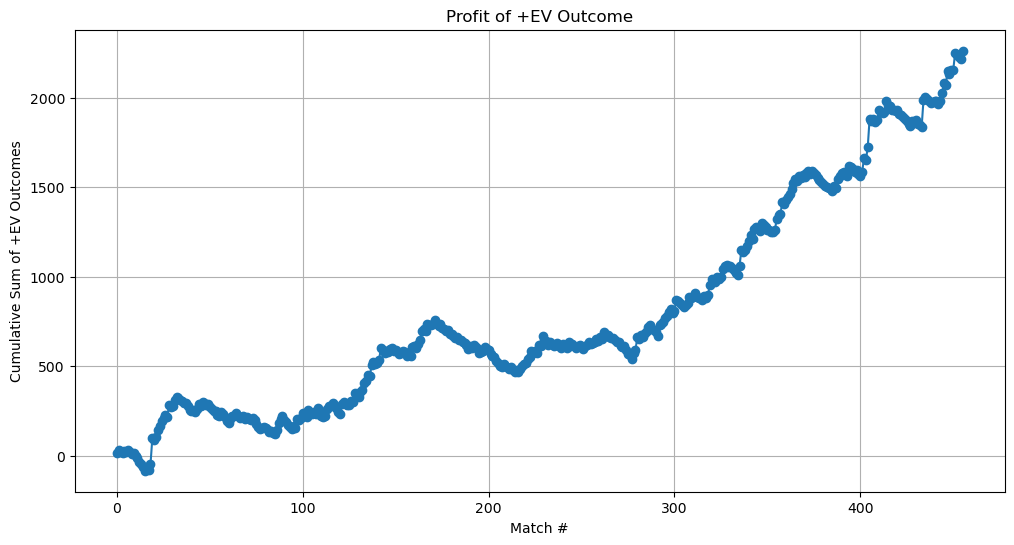

In [66]:
# Since we're using the index to represent time, we'll calculate the cumulative sum of the 'Best_Bet_Outcome' column
EV_calc_df['Cumulative_Positive_EV_Outcomes'] = EV_calc_df['Positive_EV_Outcomes'].cumsum()

# Importing matplotlib for plotting
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(EV_calc_df.index, EV_calc_df['Cumulative_Positive_EV_Outcomes'], marker='o', linestyle='-')
plt.title('Profit of +EV Outcome')
plt.xlabel('Match #')
plt.ylabel('Cumulative Sum of +EV Outcomes')
plt.grid(True)
plt.show()
